In [410]:
%load_ext autoreload
%autoreload 2
import os
import GCRCatalogs
import time
import matplotlib.pyplot as plt
import pickle
import sys
import clmm
import clmm.dataops as da
import glob
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import sys
import photoz_utils as utils
import see_cl as see
from astropy.table import Table
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
    from clmm.dataops import compute_galaxy_weights
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
cosmo.eval_sigma_crit

In [417]:
def delete_file(list_filename):
     for f in list_filename:
        os.remove(f)

In [418]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit

In [442]:
file = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/l*')
#file = glob.glob('./job/lensing*')
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [443]:
#file 

In [444]:
len(file)

5856

In [445]:
len(file)

5856

In [446]:
file[0]

'/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/lensing_catalog_halo_4835.pkl'

In [447]:
cluster_id_saved = []
for f in file:
   # cluster_id_saved.append(int(f.split('.pkl')[0].split('halo_')[1]))
    cluster_id_saved.append(f.split('halo_')[1])

In [448]:
len(cluster_id_saved)

5856

# Check extraction

In [449]:
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [450]:
index = 10#int(np.random.random()*4000)
cltest = edit.load_pickle(file[index])
cluster_id = int(file[index].split('.pkl')[0].split('halo_')[1])
lens = lens_cat[lens_cat['cluster_id'] == cluster_id][0]
ra, dec, z = lens['ra'], lens['dec'], lens['redshift']

In [451]:
#cltest['e1'] = cltest[ 'e1_HSM']
#cltest['e2'] = cltest[ 'e2_HSM']
#cltest['z'] = cltest['photoz_mean']
see.check(cltest, ra, dec, z, cosmo)

['ra', 'dec', 'z', 'galaxy_id', 'mag_i', 'mag_r', 'mag_y', 'shear1', 'shear2', 'kappa', 'e1_true', 'e2_true', 'g1', 'g2', 'e1', 'e2', 'sigma_c_photoz_bpz', 'p_background_bpz', 'photoz_err_bpz', 'sigma_c_photoz_estimate_0_bpz', 'sigma_c_photoz_estimate_1_bpz', 'sigma_c_photoz_estimate_2_bpz', 'z_estimate_0_bpz', 'z_estimate_1_bpz', 'z_estimate_2_bpz', 'photoz_mean_bpz', 'photoz_mode_bpz', 'photoz_odds_bpz', 'sigma_c_photoz_flex', 'p_background_flex', 'photoz_err_flex', 'sigma_c_photoz_estimate_0_flex', 'sigma_c_photoz_estimate_1_flex', 'sigma_c_photoz_estimate_2_flex', 'z_estimate_0_flex', 'z_estimate_1_flex', 'z_estimate_2_flex', 'photoz_mean_flex', 'photoz_mode_flex', 'photoz_odds_flex']
cluster: ra, dec = 52.71937563448216,-44.73281158996169
cluster: z = 0.6591492
----
galaxies: maximum distance = 10.099452255217733
galaxies: minimum redshift = 0.7091509313429429
galaxies: minimum ra, maximum ra = 52.15400501367141,53.28494660589296
galaxies: minimum dec, maximum dec = -45.1343312184

In [429]:
len(cltest)

105028

(array([3.0000e+00, 4.9000e+01, 3.2400e+02, 9.0300e+02, 2.3230e+03,
        5.2780e+03, 9.9640e+03, 1.6941e+04, 3.0359e+04, 3.8884e+04]),
 array([17.15324847, 17.93789524, 18.722542  , 19.50718877, 20.29183553,
        21.0764823 , 21.86112906, 22.64577583, 23.43042259, 24.21506936,
        24.99971612]),
 <a list of 10 Patch objects>)

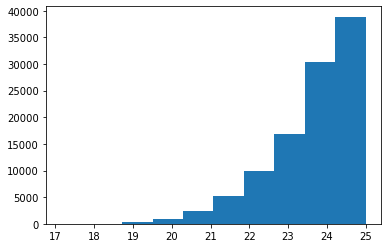

In [430]:
plt.hist(cltest['mag_i_cModel'])

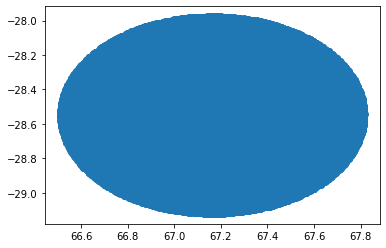

In [431]:
plt.scatter(cltest['ra'], cltest['dec'])

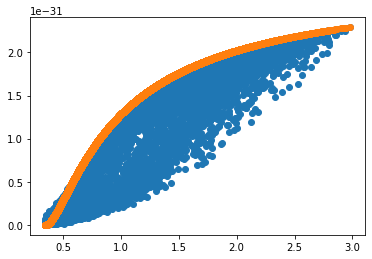

In [432]:
plt.scatter(cltest['photoz_mean'], 1/cltest['sigma_c_photoz']**2)
#plt.scatter(cltest['z'], 1/cltest['sigma_c_photoz_flex']**2)
plt.scatter(cltest['z'], 1/cosmo.eval_sigma_crit(z, cltest['z'])**2)

# Check missing extraction

In [433]:
lens_cat_to_extract = lens_cat[(lens_cat['richness'] > 20)*(lens_cat['redshift'] > .2)]
print(len(lens_cat_to_extract))

4240


In [434]:
mask = np.isin(lens_cat_to_extract['cluster_id'], cluster_id_saved)

In [435]:
lens_cat_miss = lens_cat_to_extract[np.invert(mask)]
print(len(lens_cat_miss))

1475


In [438]:
index = np.arange(len(lens_cat_to_extract['ra']))

In [440]:
index_mask = index[np.invert(mask)]

In [441]:
index_mask 

array([   0,    2,    3, ..., 4237, 4238, 4239])

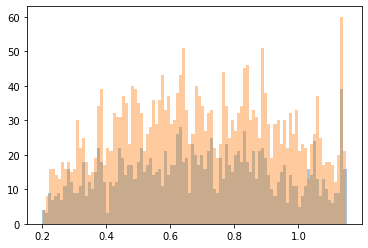

In [409]:
plt.hist(lens_cat_to_extract[np.invert(mask)]['redshift'], alpha=.4, bins=100)
plt.hist(lens_cat_to_extract[mask]['redshift'], alpha=.4, bins=100)
plt.show()

In [211]:
a = [str(i) for i in range(10)]

In [212]:
a

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [213]:
atosave = a

In [214]:
atosave.remove('0')

In [215]:
atosave


['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [216]:
a

['1', '2', '3', '4', '5', '6', '7', '8', '9']